In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


# Year 1, single source bin analysis

In [62]:
%%time
dirname = './single_source_ClY1'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y1, 1)', Omega_s={'gamma_t':140, 'xi':140})
fisherCS = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                              label='Cosmic Shear (Y1, 1)', Omega_s={'gamma_t':140, 'xi':140})
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1, 
                                 label='3x2pt (Y1, 1)', Omega_s={'gamma_t':140, 'xi':140})

cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)
CPU times: user 36.4 s, sys: 1.43 s, total: 37.9 s
Wall time: 9.67 s


In [63]:
fisher2x2pt.show1Sigma()

omega_b         -- 0.03274069153067265
omega_c         -- 0.07512944702890068
Omega_de        -- 0.010474396211171523
sigma8          -- 0.09833015262592702
ns              -- 0.17968992892149185
b1lowz          -- 0.39209820569454096
b1cmass1        -- 0.2414204370186218
b1cmass2        -- 0.24810790511408087
alphamaglowz    -- 104.5399392489117
alphamagcmass1  -- 21.97872403908106
alphamagcmass2  -- 21.426995196507566
dzph            -- 1.1356184594035437
dm              -- 0.598769101568156


In [64]:
fisherCS.show1Sigma()

omega_b   -- 1.654502427624812
omega_c   -- 4.952843006293825
Omega_de  -- 10.659475003306337
sigma8    -- 7.573189261625258
ns        -- 6.755404874597032
dzph      -- 10.394282764409658
dm        -- 7.698864198004373


In [65]:
fisher3x2pt.show1Sigma()

omega_b         -- 0.031119571625110025
omega_c         -- 0.06762732734929794
Omega_de        -- 0.008711542414829056
sigma8          -- 0.07941928766504855
ns              -- 0.1256461628750947
b1lowz          -- 0.3067926097743399
b1cmass1        -- 0.22125759758400124
b1cmass2        -- 0.23517589436202999
alphamaglowz    -- 62.027069892637044
alphamagcmass1  -- 5.960636952368079
alphamagcmass2  -- 4.116346006487881
dzph            -- 0.38757250687898087
dm              -- 0.34282158450478945


In [66]:
corner = hsc3x2pt.corner_class()

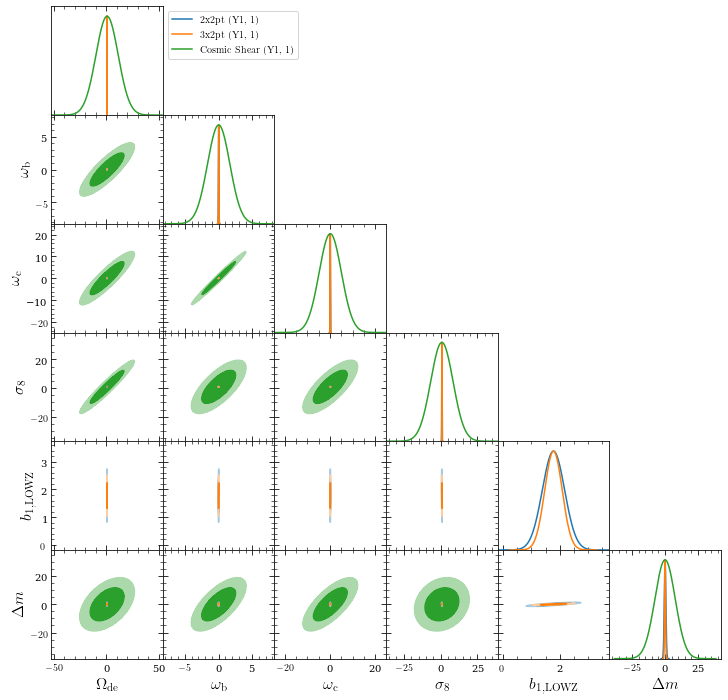

In [67]:
corner.plot_corner([fisher2x2pt, fisher3x2pt, fisherCS], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm'], 
                   figsize_ratio=2, usetex=True)

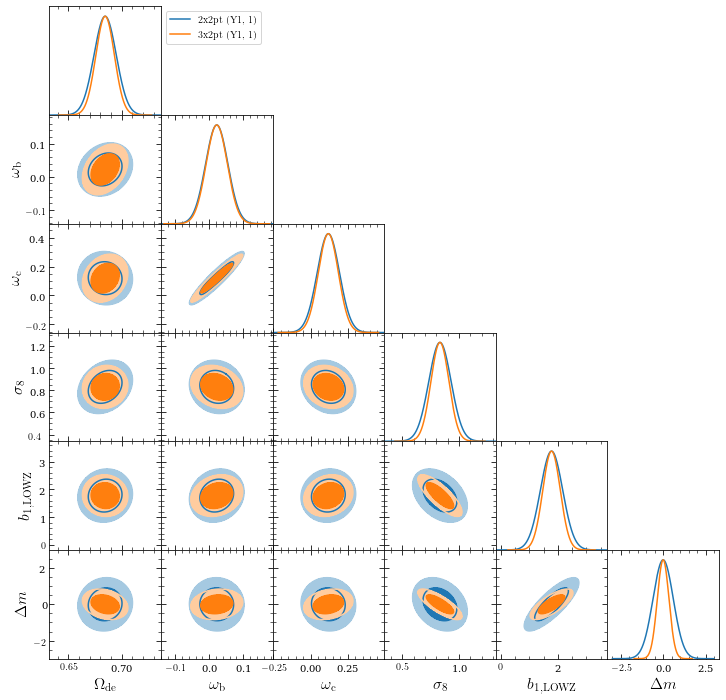

In [68]:
corner.plot_corner([fisher2x2pt, fisher3x2pt], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm'], 
                   figsize_ratio=2, usetex=True)

# Year 1, double source bin analysis

In [69]:
%%time
dirname = './double_source_ClY1'
fisher2x2pt2 = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                  label='2x2pt (Y1, 2)', Omega_s={'gamma_t':140, 'xi':140})
fisherCS2 = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                               label='Cosmic Shear (Y1, 2)', Omega_s={'gamma_t':140, 'xi':140})
fisher3x2pt2 = hsc3x2pt.getFisher(dirname, power_b1, 
                                  label='3x2pt (Y1, 2)', Omega_s={'gamma_t':140, 'xi':140})

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)
CPU times: user 2min 1s, sys: 5.57 s, total: 2min 7s
Wall time: 35.6 s


In [70]:
fisher2x2pt2.show1Sigma()

omega_b         -- 0.032688060835701666
omega_c         -- 0.07497829863020308
Omega_de        -- 0.010464899574855295
sigma8          -- 0.09815366041385211
ns              -- 0.17925050172492293
b1lowz          -- 0.39024611194982367
b1cmass1        -- 0.24095481116769882
b1cmass2        -- 0.24806177140725624
alphamaglowz    -- 103.98554060492836
alphamagcmass1  -- 21.60536229169014
alphamagcmass2  -- 21.054336589225027
dzph1           -- 0.8254154689363414
dm1             -- 0.584207411068607
dzph2           -- 1.5243640079786065
dm2             -- 0.6113650277273199


In [71]:
fisherCS2.show1Sigma()

omega_b   -- 0.5059858604194171
omega_c   -- 1.1311420526365843
Omega_de  -- 1.6208548501695625
sigma8    -- 1.0746640692035427
ns        -- 1.1624332658780934
dzph1     -- 1.3498312499430685
dm1       -- 2.2153125970388827
dzph2     -- 1.7664002738506683
dm2       -- 2.3113876498057433


In [72]:
fisher3x2pt2.show1Sigma()

omega_b         -- 0.031052237007302377
omega_c         -- 0.06651477575015027
Omega_de        -- 0.008224730463605359
sigma8          -- 0.06982940834336782
ns              -- 0.11039881019994907
b1lowz          -- 0.25722588753197706
b1cmass1        -- 0.2145723752817181
b1cmass2        -- 0.2301439081792717
alphamaglowz    -- 50.04397437622559
alphamagcmass1  -- 5.876144289623468
alphamagcmass2  -- 3.224123962733254
dzph1           -- 0.13222479944726653
dm1             -- 0.17859352787313162
dzph2           -- 0.2009812509988943
dm2             -- 0.18969716080890595


In [73]:
corner = hsc3x2pt.corner_class()

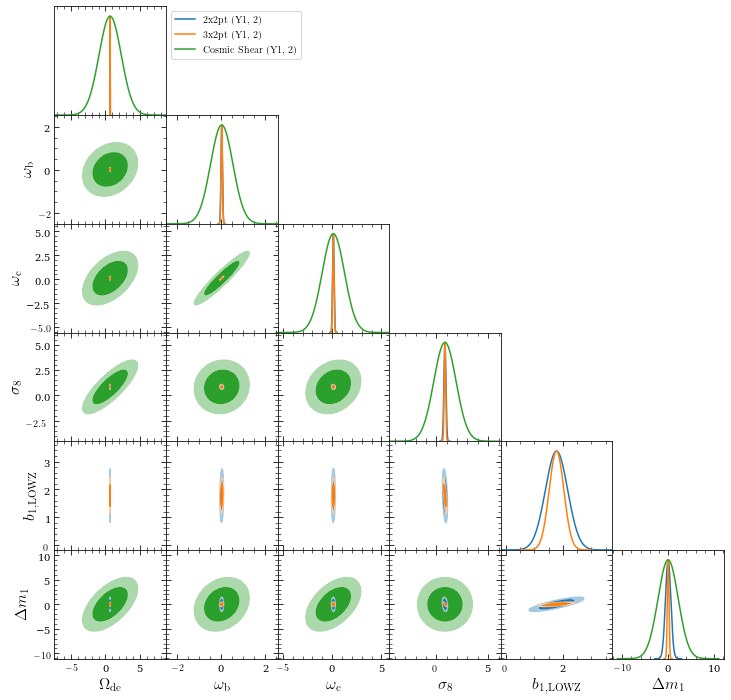

In [74]:
corner.plot_corner([fisher2x2pt2, fisher3x2pt2, fisherCS2], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm1'], 
                   figsize_ratio=2, usetex=True)

## double vs single source anlaysis

dm1 is not included any fisher analysis. Omitting it.
dzph1 is not included any fisher analysis. Omitting it.


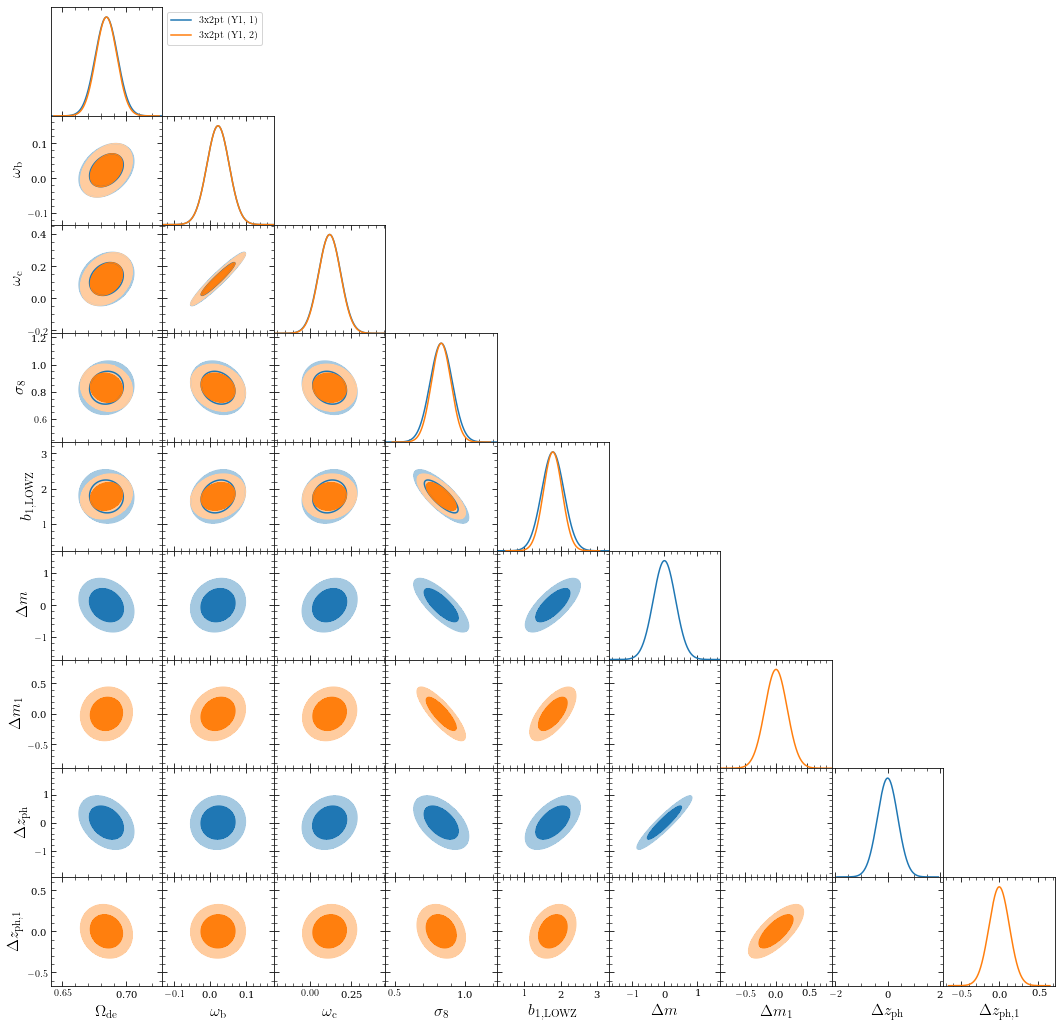

In [75]:
corner.plot_corner([fisher3x2pt, fisher3x2pt2], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm', 'dm1', 'dzph', 'dzph1'], 
                   figsize_ratio=2, usetex=True)

# Cosmic Shear alone: tomography with quadruple sources

In [76]:
%%time
dirname = './quadruple_source_ClY1'
fisherCSquad = hsc3x2pt.getFisher(dirname, power_b1, 
                                  label='CS (quad)', Omega_s={'gamma_t':140, 'xi':140})

cov.shape = (170, 170), dim(data)=(170,)
CPU times: user 4min 5s, sys: 15.6 s, total: 4min 20s
Wall time: 1min 21s


In [77]:
corner = hsc3x2pt.corner_class()

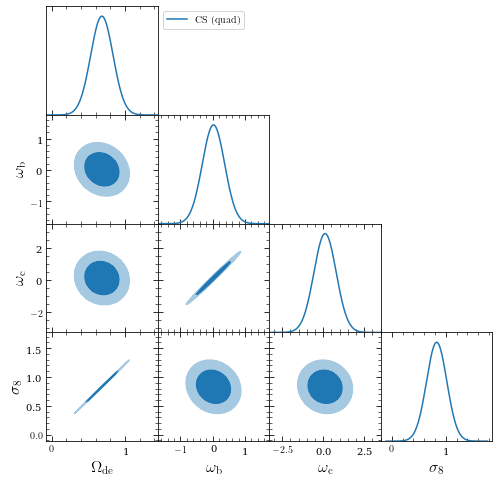

In [78]:
corner.plot_corner([fisherCSquad], ['Omega_de', 'omega_b', 'omega_c', 'sigma8'], 
                   figsize_ratio=2, usetex=True)

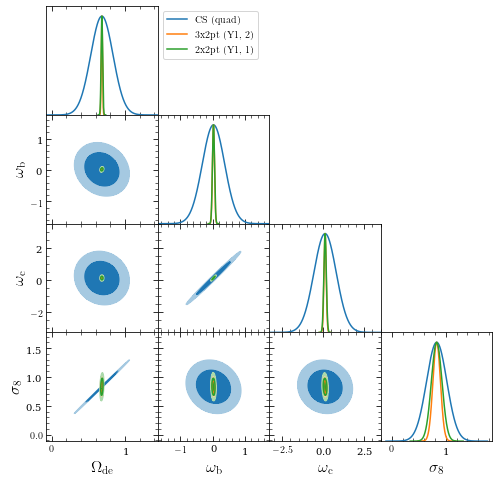

In [79]:
corner.plot_corner([fisherCSquad, fisher3x2pt2, fisher2x2pt], ['Omega_de', 'omega_b', 'omega_c', 'sigma8'], 
                   figsize_ratio=2, usetex=True)

In [83]:
c_Hamana, F_Hamana = np.array([1-0.346, 0.766]), np.array([[1.0/0.07**2,0], [0,1.0/0.1**2]])
c_Sugiyama, F_Sugiyama = np.array([1-0.283, 0.85]), np.array([[1.0/0.08**2,0],[0,1/0.13**2]])

In [84]:
fisherHamana = hsc3x2pt.Fisher_class(F_Hamana, center=c_Hamana, names=['Omega_de', 'sigma8'], label='Hamana')
fisherSugiyama = hsc3x2pt.Fisher_class(F_Sugiyama, center=c_Sugiyama, names=['Omega_de', 'sigma8'], label='Sugiyama')

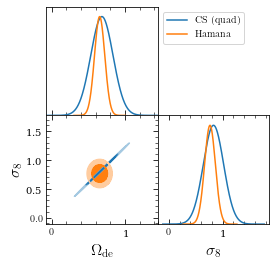

In [85]:
corner.plot_corner([fisherCSquad, fisherHamana], ['Omega_de', 'sigma8'], 
                   figsize_ratio=2, usetex=True)

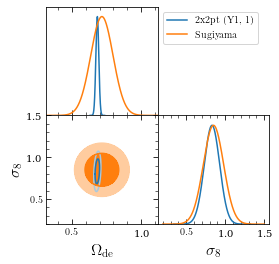

In [86]:
corner.plot_corner([fisher2x2pt, fisherSugiyama], ['Omega_de', 'sigma8'], 
                   figsize_ratio=2, usetex=True)